# **Recognizing hand-written digits using PCA**

**About Dataset:** The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.


The number of i/p features or variables or columns present in the dataset is known as dimension.

PCA is a way of converting the higher dimesnion data into a lower dimension data by ensuring that it provides similar
or maximum information

steps involved in PCA:

1) Standardize the datapoints: brings all the data to a same scale.

2) Compute the covariance matrix:

    i) Variance: it is the spread of the data from the mean or the average point.
    ii) Covariance matrix: it calculates the measure of how two variables vary each other.

3) Compute the eigen values and the eigen vectors

    i) Eigen value ------ magnitude
    ii) Eigen vectgor -------- directional_link

4) sort the eigen values -------- if the eigen values is high, information spread is high

5) select the no of pc's ------- scree plot

6) interpret the new data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

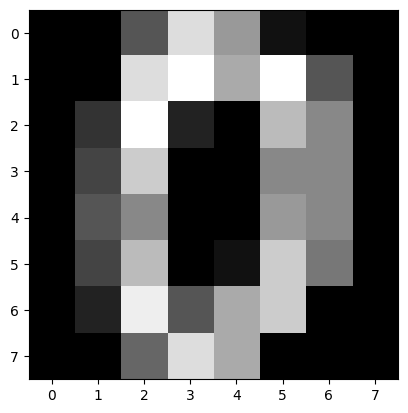

In [9]:
plt.imshow(digits.images[0],cmap=plt.cm.gray)

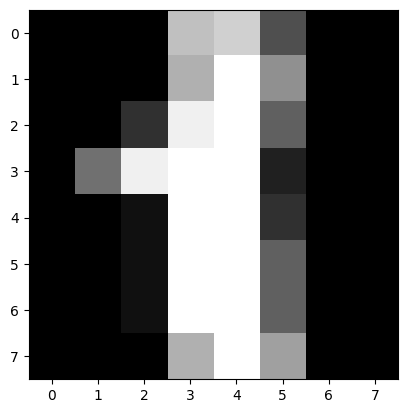

In [10]:
plt.imshow(digits.images[1],cmap=plt.cm.gray)

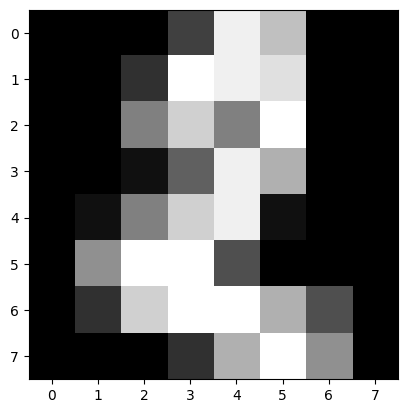

In [11]:
plt.imshow(digits.images[2],cmap=plt.cm.gray)

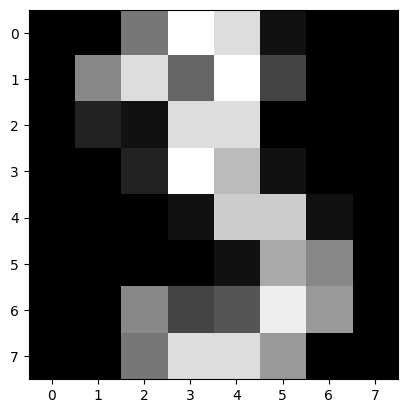

In [12]:
plt.imshow(digits.images[3],cmap=plt.cm.gray)

In [ ]:
x = pd.DataFrame(digits.data)
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y = pd.DataFrame(digits.target)
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


standardization is the scaling technique where we make the mean as 0 and standard deviation as 1

in pyhton we have the inbuilt function present for it

In [ ]:

from sklearn.preprocessing import StandardScaler

In [ ]:
x_std =  StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
x_std.shape

(1797, 64)

In [ ]:
x1 = x_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [ ]:
x1.shape

(64, 1797)

In [ ]:
#covariance matrix

cov_mat = np.cov(x1)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [ ]:
cov_mat.shape

(64, 64)

In [ ]:
#eigrn values and the eigen vectors

eigen_val, eigen_vec = np.linalg.eig(cov_mat)

In [ ]:
print(eigen_val) #-------magnitude

[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.05037444 0.29406627 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]


In [ ]:
print(eigen_vec)

[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.          0.
   0.        ]
 [ 0.1198106   0.16508926  0.10036559 ...  0.          0.
   0.        ]
 [ 0.07149362  0.07132924  0.09244589 ...  0.          0.
   0.        ]]


In [ ]:
len(eigen_val)

64

In [ ]:
len(eigen_vec)

64

In [ ]:
total = sum(eigen_val)

In [ ]:
total

61.03396436525629

In [ ]:
(7.34477606/61.03396436525629)*100

12.033916093087718

In [ ]:
var_exp = [(i/total)*100 for i in eigen_val]

In [ ]:
var_exp     #percenytage of variance captured by individual pc's

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.08253509448180278,
 0.48180758644514254,
 0.45371925985845096,
 0.10369573015571817,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.12510074249730116,
 0.13511841133708546,
 0.14776269410608744,
 0.1612360622567

In [ ]:
#cumulative explained variance

cum_var_exp = np.cumsum(var_exp)

In [ ]:
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  93.80175675,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

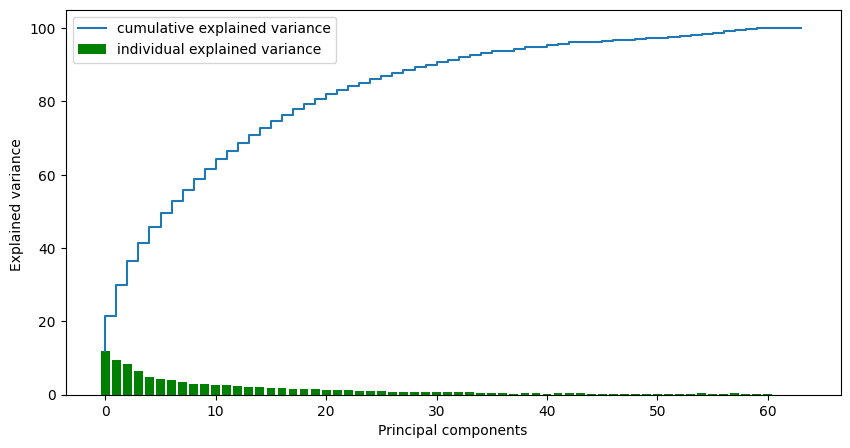

In [ ]:
#scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std, y, train_size = 0.8)

In [ ]:
x_train.shape

(1437, 64)

In [ ]:
x_test.shape

(360, 64)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# we can select the components from the scree plot or can directly pass the percentage of the information
# that we want to retain in the pca function


pca = PCA(n_components=30)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

PCA(n_components=20): You are creating a PCA object with the number of components set to 20. This means that PCA will transform your data into a new set of 20 principal components.

pca_x_train = pca.fit_transform(x_train): You are fitting the PCA model on your training data (x_train) and then transforming it to obtain the principal components. The transformed data is stored in pca_x_train.

pca_x_test = pca.transform(x_test): You are transforming your test data (x_test) using the same PCA model that was fitted on the training data. This ensures consistency in the transformation between the training and test datasets. The transformed test data is stored in pca_x_test.

After this process, pca_x_train and pca_x_test contain the low-dimensional representations of your original data obtained by projecting them onto the principal components identified by PCA. These reduced-dimensional datasets can be used for further analysis or as input to machine learning models.

In [ ]:
pca_x_train.shape

(1437, 30)

In [ ]:
pca_x_test.shape

(360, 30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(pca_x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predict = dt.predict(pca_x_test)

In [ ]:
predict

array([5, 8, 9, 3, 1, 5, 2, 7, 7, 4, 8, 1, 7, 4, 5, 9, 5, 2, 9, 6, 7, 5,
       8, 1, 8, 7, 6, 2, 1, 9, 2, 4, 2, 7, 8, 6, 2, 3, 3, 5, 4, 6, 3, 5,
       1, 1, 5, 6, 1, 2, 2, 3, 3, 1, 7, 3, 0, 1, 0, 4, 4, 6, 9, 5, 7, 1,
       6, 9, 8, 8, 0, 0, 0, 9, 3, 3, 8, 0, 4, 6, 1, 9, 3, 7, 7, 0, 5, 8,
       4, 3, 0, 9, 3, 4, 1, 3, 0, 9, 1, 3, 0, 2, 8, 4, 4, 3, 7, 3, 7, 8,
       8, 6, 2, 1, 3, 8, 0, 6, 3, 2, 8, 4, 1, 7, 5, 8, 3, 8, 9, 6, 8, 7,
       6, 9, 3, 0, 6, 5, 6, 1, 7, 6, 4, 2, 1, 8, 3, 7, 0, 6, 1, 7, 4, 3,
       9, 2, 7, 3, 4, 7, 8, 6, 9, 5, 3, 0, 9, 8, 8, 0, 1, 5, 2, 4, 1, 9,
       5, 4, 1, 1, 8, 5, 3, 4, 2, 9, 1, 3, 8, 2, 5, 7, 3, 0, 4, 9, 0, 1,
       2, 6, 7, 6, 4, 7, 7, 8, 8, 4, 5, 6, 4, 1, 1, 0, 1, 8, 3, 6, 1, 3,
       1, 3, 2, 5, 0, 1, 1, 0, 4, 9, 1, 6, 6, 5, 1, 1, 7, 2, 0, 3, 9, 5,
       4, 8, 5, 2, 5, 0, 3, 2, 7, 5, 0, 3, 0, 0, 4, 4, 5, 7, 7, 8, 3, 3,
       1, 3, 9, 2, 2, 5, 9, 3, 6, 2, 3, 3, 6, 3, 6, 8, 7, 5, 3, 2, 6, 8,
       4, 6, 7, 3, 3, 0, 0, 4, 5, 5, 8, 8, 6, 0, 3,

In [ ]:
y_test

,0
671,5
554,8
815,9
937,5
1760,1
...,...
198,4
1786,9
927,2
525,9


In [ ]:
from sklearn.metrics import *

In [ ]:
cm = confusion_matrix(y_test,predict)

In [ ]:
print(cm)

[[31  0  0  0  1  1  0  0  0  1]
 [ 0 32  1  1  0  1  0  0  1  0]
 [ 0  0 29  0  0  0  0  0  1  0]
 [ 0  1  1 40  0  3  1  0  1  2]
 [ 0  0  0  0 30  1  0  1  3  0]
 [ 0  1  0  1  0 28  0  0  3  2]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 4  0  0  2  1  1  0 31  0  0]
 [ 0  3  1  3  0  0  0  1 26  1]
 [ 1  2  0  2  0  1  0  1  2 25]]


In [ ]:
# the diagonals in the matrix is returning the correctly classified data
# and the rest other is missclassified data

In [ ]:
cm.shape

(10, 10)

In [ ]:
accuracy_score(y_test,predict)

0.8472222222222222